#Data overview

##Data connection

In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [532]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Mate_homework/dataset/Final_project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_homework/dataset/Final_project


In [533]:
# Uploading dataset
countries = pd.read_csv("countries.csv")
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In this table, we have data about countries, regions, subregions, and their codes related to the company's product sales

In [534]:
# Uploading dataset
events = pd.read_csv("events.csv")
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In this table, we have detailed data on sales for several years

In [535]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


Main calculations for quantitative values

In [536]:
# Uploading dataset
products = pd.read_csv("products.csv")
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In this table, we have data about product categories and id

**Key fields**

We will join the countries table to the sales table by country code. And we will join the categories table to the sales table using product ID

#Data cleaning

##Data overview

In [537]:
print(f"In the countries table - {countries.shape} rows and columns")
print(f"In the sales table - {events.shape} rows and columns")
print(f"In the product categories table - {products.shape} rows and columns")

In the countries table - (249, 5) rows and columns
In the sales table - (1330, 10) rows and columns
In the product categories table - (12, 2) rows and columns


In [538]:
print("General information about the countries table")
countries.info()

print("\nGeneral information about the sales table")
events.info()

print("\nGeneral information about the product categories table")
products.info()

General information about the countries table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB

General information about the sales table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel  

##Number of missing values in each dataset

In [539]:
print(f"Number of missing values by countries \n{countries.isna().sum()}")

print(f"\nNumber of missing values by sales \n{events.isna().sum()}")

print(f"\nNumber of missing values by product categories \n{products.isna().sum()}")

Number of missing values by countries 
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

Number of missing values by sales 
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

Number of missing values by product categories 
id           0
item_type    0
dtype: int64


##Proportion of missing data in the tables. Filling/removing missing values

In [540]:
print(f"Percentage of missing data in the total for countries \n{countries.isna().sum() / countries.shape[0] * 100}")

Percentage of missing data in the total for countries 
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


From the previous calculations, we see that some country has no code and no assigned region or subregion. I assume that the 'name' column may indicate the name of a part of the world or something similar

Since all records in this table are unique and there is no point in filling missing values with something previous, we will delete this row.

In [541]:
#removing missing values from the countries table
countries.dropna()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa


In [542]:
print(f"Percentage of missing data in the total for sales \n{events.isna().sum() / events.shape[0]}")

Percentage of missing data in the total for sales 
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.061654
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.001504
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In the situation with the sales table, we have as many as 82 missing cells in the Country Code column, so we will fill these cells with the value 'Undefined'

In [543]:
#Filling missing values in Country Code
events["Country Code"] = events["Country Code"].fillna("Undefined")

Regarding the missing data in the Units Sold column, we will fill it with the average number of products sold overall. Since, as we see from the previous calculations, the median and mean values of this indicator are almost identical

In [544]:
#Filling missing values in Units Sold
events["Units Sold"] = events["Units Sold"].fillna(events["Units Sold"].mean())

In [545]:
print(f"Percentage of missing data in the total for product categories \n{products.isna().sum() / products.shape[0] * 100}")

Percentage of missing data in the total for product categories 
id           0.0
item_type    0.0
dtype: float64


There are no missing data in the product categories table

##Data transformation

In [546]:
#Transforming data in date columns to the correct format
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])
print(events.dtypes)

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object


In [547]:
#Transforming values in the Sales Channel column into a uniform format
events["Sales Channel"] = events["Sales Channel"].str.title()

##Analysis of duplicates presence in the tables

In [548]:
#Checking the countries table for duplicates
countries_duplicate_rows = countries.duplicated()
print(countries_duplicate_rows)
print(f"\nIn the table {countries_duplicate_rows.sum()} duplicates")

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool

In the table 0 duplicates


In [549]:
#Checking the sales table for duplicates
events_duplicate_rows = events.duplicated()
print(events_duplicate_rows)
print(f"\nIn the table {events_duplicate_rows.sum()} duplicates")

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool

In the table 0 duplicates


In [550]:
#Checking the products table for duplicates
products_duplicate_rows = products.duplicated()
print(products_duplicate_rows)
print(f"\nIn the table {products_duplicate_rows.sum()} duplicates")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In the table 0 duplicates


#Data analysis and visualization

##Merging tables into a single DataFrame

In [551]:
#Renaming columns in the table
countries = countries.rename(columns={"alpha-3": "Country Code", "name": "Country", "region": "Region", "sub-region": "Sub-Region"})
countries.head()

,Country,alpha-2,Country Code,Region,Sub-Region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [552]:
#Merging the countries table and sales table
first_join = pd.merge(events, countries, on="Country Code", how="left")
print(first_join)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M    Undefined        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

In [553]:
#Checking for missing values after merging the countries and sales tables
print(f"Number of missing values by sales \n{first_join.isna().sum()}")

Number of missing values by sales 
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code       0
Product ID         0
Sales Channel      0
Units Sold         0
Unit Price         0
Unit Cost          0
Country           82
alpha-2           82
Region            82
Sub-Region        82
dtype: int64


In [554]:
#Filling missing values in the merged table
first_join["Country"] = first_join["Country"].fillna("Undefined")
first_join["alpha-2"] = first_join["alpha-2"].fillna("Undefined")
first_join["Region"] = first_join["Region"].fillna("Undefined")
first_join["Sub-Region"] = first_join["Sub-Region"].fillna("Undefined")

In [555]:
#Renaming columns in the table
products = products.rename(columns={"id": "Product ID", "item_type": "Category"})
products.head()

,Product ID,Category
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [556]:
#Joining the last table with product information and creating the main dataset for analysis.
df = pd.merge(first_join, products, on="Product ID", how="inner")
print(df)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M    Undefined        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

##Key performance metrics of the company

In [557]:
#Main calculations for determining company sales, revenue, and expenses
df["Sales"] = df["Units Sold"] * df["Unit Price"]
df["Cost"] = df["Units Sold"] * df["Unit Cost"]
df["Profit"] = df["Sales"] - df["Cost"]

df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Country,alpha-2,Region,Sub-Region,Category,Sales,Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Undefined,7940,Online,4693.0,668.27,502.54,Undefined,Undefined,Undefined,Undefined,Household,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68


In [558]:
#Calculation of key metrics
number_of_orders = df["Order ID"].count()
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_cost = df["Cost"].sum()
profitability = round((total_profit / total_sales * 100), 2)
number_of_countries = df["Country"].nunique()

print(f"Total number of orders: {number_of_orders}")
print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Profit: ${total_profit:.2f}")
print(f"Total Cost: ${total_cost:.2f}")
print(f"Profitability: {profitability}%")
print(f"Number of countries: {number_of_countries}")

Total number of orders: 1330
Total Sales: $1704623436.08
Total Profit: $501841827.12
Total Cost: $1202781608.96
Profitability: 29.44%
Number of countries: 46


##Sales analysis across different dimensions

###Sales analysis by product categories

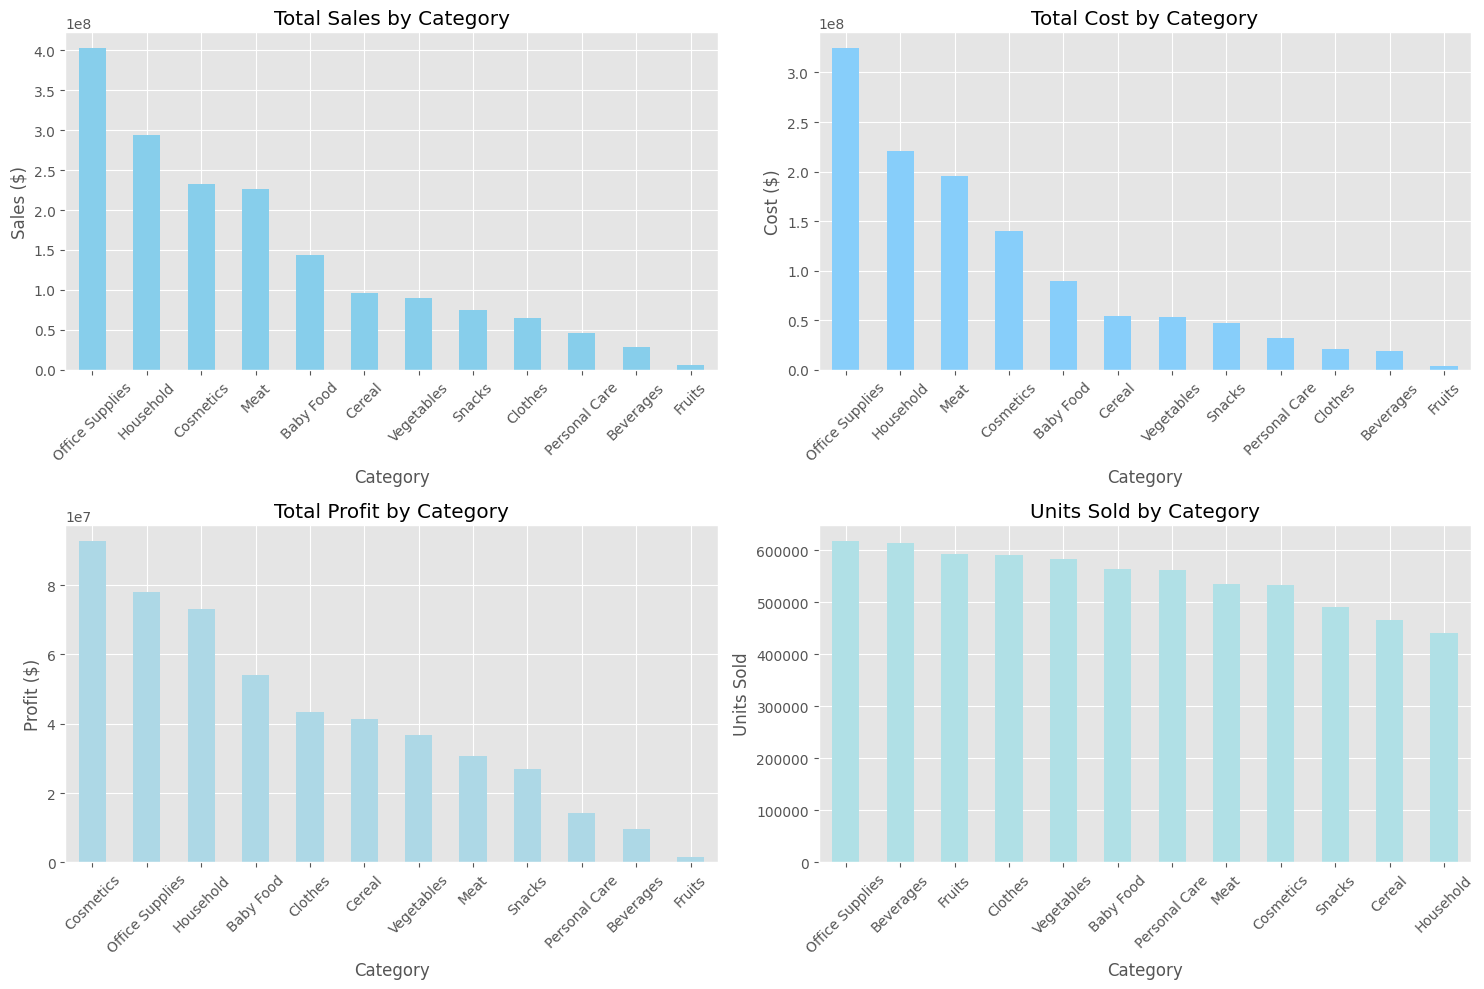

In [559]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Sales analysis and visualization by product categories
df.groupby("Category")["Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Total Sales by Category")
ax[0, 0].set_xlabel("Category")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].tick_params(axis="x", rotation=45)

#Sales analysis and visualization of expenses by product categories
df.groupby("Category")["Cost"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 1], color="lightskyblue")
ax[0, 1].set_title("Total Cost by Category")
ax[0, 1].set_xlabel("Category")
ax[0, 1].set_ylabel("Cost ($)")
ax[0, 1].tick_params(axis="x", rotation=45)

#Analysis and visualization of revenue by product categories
df.groupby("Category")["Profit"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 0], color="lightblue")
ax[1, 0].set_title("Total Profit by Category")
ax[1, 0].set_xlabel("Category")
ax[1, 0].set_ylabel("Profit ($)")
ax[1, 0].tick_params(axis="x", rotation=45)

#Analysis and visualization of the number of products sold by product categories
df.groupby("Category")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 1], color="powderblue")
ax[1, 1].set_title("Units Sold by Category")
ax[1, 1].set_xlabel("Category")
ax[1, 1].set_ylabel("Units Sold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()

###Sales analysis by countries (Top-10)

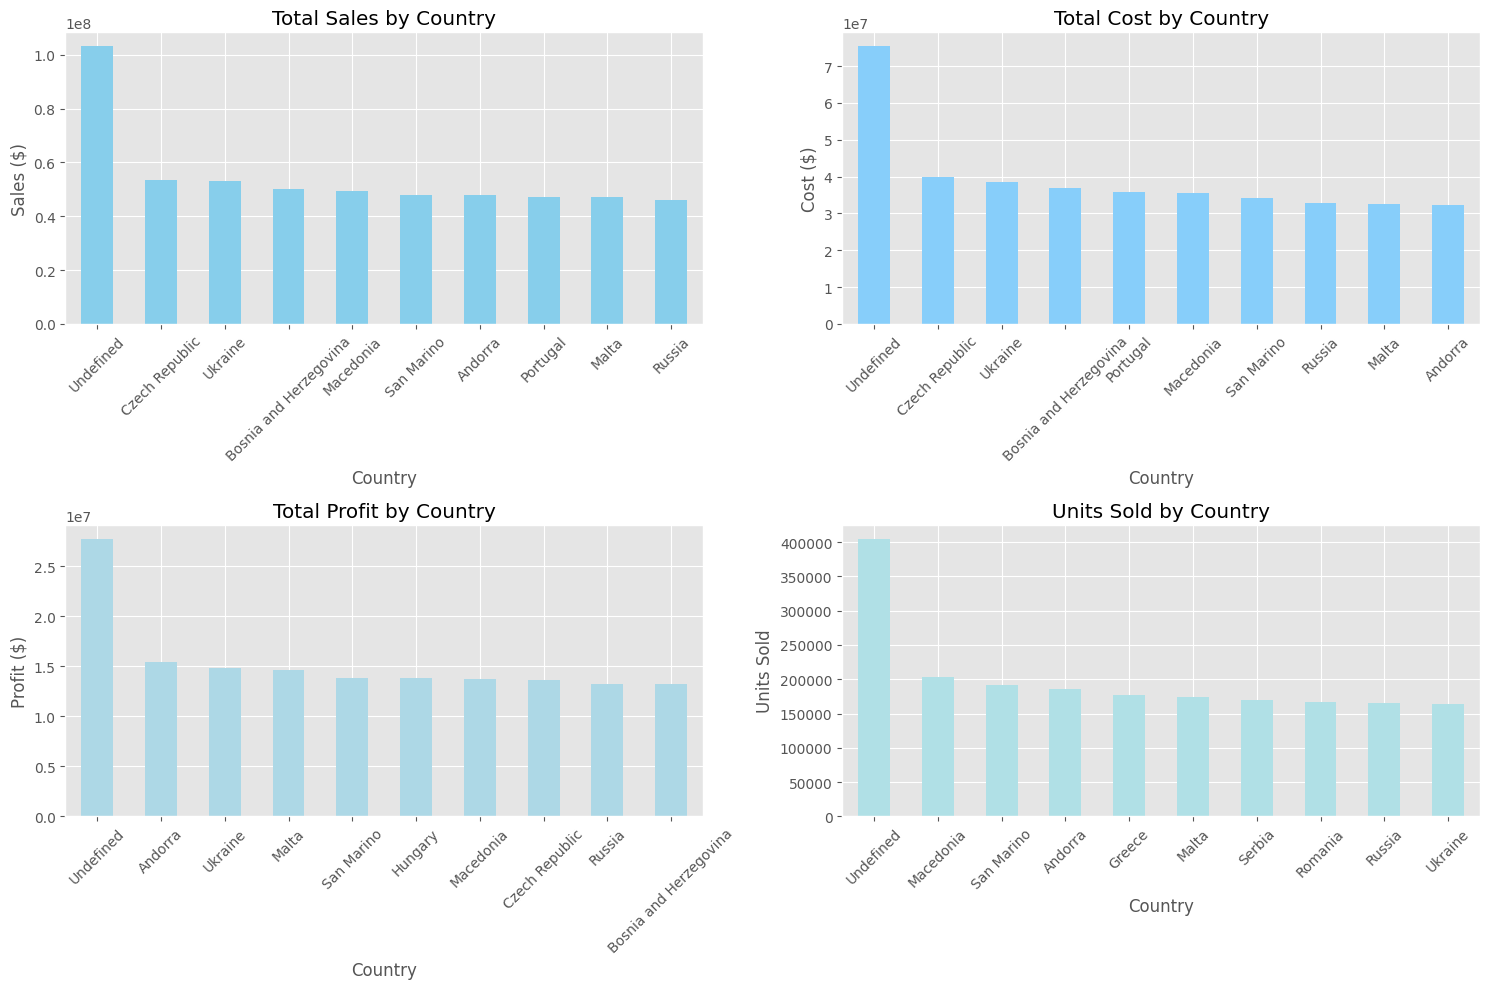

In [560]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Sales analysis by countries
df.groupby("Country")["Sales"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Total Sales by Country")
ax[0, 0].set_xlabel("Country")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].tick_params(axis="x", rotation=45)

#Analysis and visualization of expenses by countries
df.groupby("Country")["Cost"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[0, 1], color="lightskyblue")
ax[0, 1].set_title("Total Cost by Country")
ax[0, 1].set_xlabel("Country")
ax[0, 1].set_ylabel("Cost ($)")
ax[0, 1].tick_params(axis="x", rotation=45)

#Analysis and visualization of profit by countries
df.groupby("Country")["Profit"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[1, 0], color="lightblue")
ax[1, 0].set_title("Total Profit by Country")
ax[1, 0].set_xlabel("Country")
ax[1, 0].set_ylabel("Profit ($)")
ax[1, 0].tick_params(axis="x", rotation=45)

#Analysis and visualization of the number of products sold by countries
df.groupby("Country")["Units Sold"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[1, 1], color="powderblue")
ax[1, 1].set_title("Units Sold by Country")
ax[1, 1].set_xlabel("Country")
ax[1, 1].set_ylabel("Units Sold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()

###Sales analysis by regions



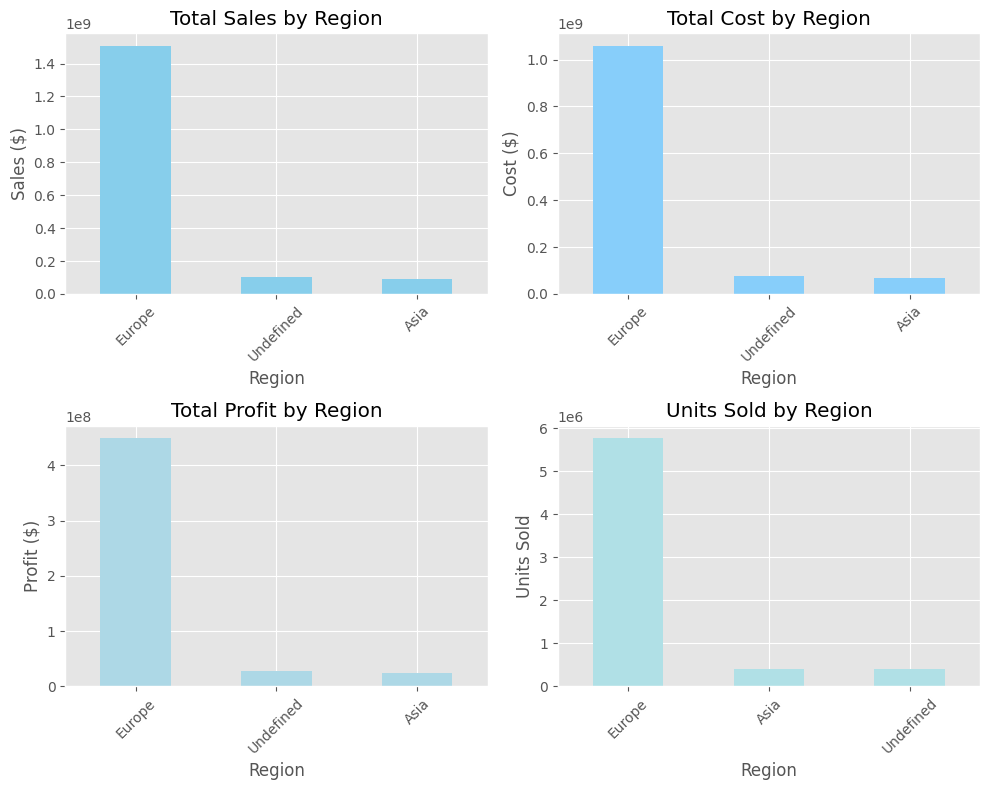

In [561]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#Analysis and visualization of sales by regions
df.groupby("Region")["Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Total Sales by Region")
ax[0, 0].set_xlabel("Region")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].tick_params(axis="x", rotation=45)

#Analysis and visualization of expenses by regions
df.groupby("Region")["Cost"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 1], color="lightskyblue")
ax[0, 1].set_title("Total Cost by Region")
ax[0, 1].set_xlabel("Region")
ax[0, 1].set_ylabel("Cost ($)")
ax[0, 1].tick_params(axis="x", rotation=45)

#Analysis and visualization of revenue by regions
df.groupby("Region")["Profit"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 0], color="lightblue")
ax[1, 0].set_title("Total Profit by Region")
ax[1, 0].set_xlabel("Region")
ax[1, 0].set_ylabel("Profit ($)")
ax[1, 0].tick_params(axis="x", rotation=45)

#"Analysis and visualization of the number of products sold by regions
df.groupby("Region")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 1], color="powderblue")
ax[1, 1].set_title("Units Sold by Region")
ax[1, 1].set_xlabel("Region")
ax[1, 1].set_ylabel("Units Sold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()

###Sales analysis by sales channels

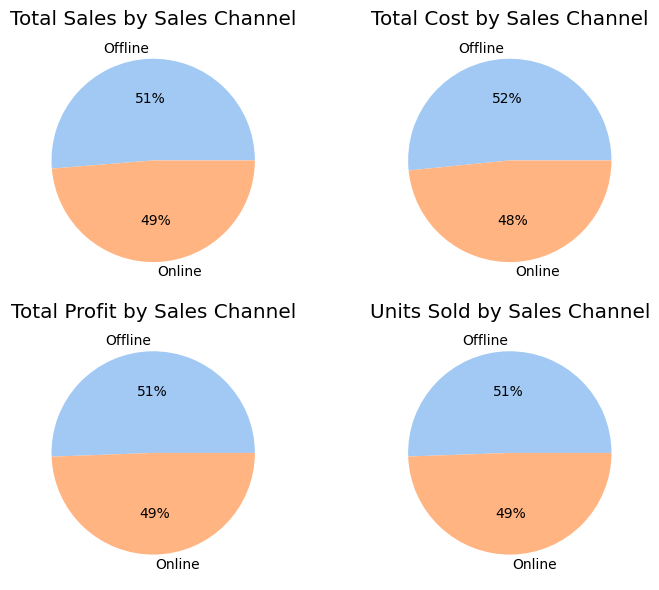

In [562]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
colors = sns.color_palette('pastel')

#Analysis and visualization of sales by sales channels
df.groupby("Sales Channel")["Sales"].sum().plot(kind="pie", ax=ax[0, 0], colors=colors, autopct='%.0f%%')
ax[0, 0].set_title("Total Sales by Sales Channel")
ax[0, 0].set_ylabel("")
ax[0, 0].set_xlabel("")

#Analysis and visualization of expenses by sales channels
df.groupby("Sales Channel")["Cost"].sum().sort_values(ascending=False).plot(kind="pie", ax=ax[0, 1], colors=colors, autopct='%.0f%%')
ax[0, 1].set_title("Total Cost by Sales Channel")
ax[0, 1].set_ylabel("")
ax[0, 1].set_xlabel("")

#Analysis and visualization of revenue by sales channels
df.groupby("Sales Channel")["Profit"].sum().sort_values(ascending=False).plot(kind="pie", ax=ax[1, 0], colors=colors, autopct='%.0f%%')
ax[1, 0].set_title("Total Profit by Sales Channel")
ax[1, 0].set_ylabel("")
ax[1, 0].set_xlabel("")


#Analysis and visualization of the number of products sold by sales channels
df.groupby("Sales Channel")["Units Sold"].sum().sort_values(ascending=False).plot(kind="pie", ax=ax[1, 1], colors=colors, autopct='%.0f%%')
ax[1, 1].set_title("Units Sold by Sales Channel")
ax[1, 1].set_ylabel("")
ax[1, 1].set_xlabel("")

plt.tight_layout()

plt.show()

##Analysis of the time interval between order and its shipment across different dimensions

In [563]:
#Calculation of the time interval between order and its shipment and creation of the corresponding column
df["Delivery Days"] = (df["Ship Date"] - df["Order Date"]).dt.days
mean_delivery_days = round((df["Delivery Days"].mean()), 0)

print(f"On average, delivery takes {mean_delivery_days} days")

On average, delivery takes 25.0 days


###Analysis of the time interval between order and shipment by product categories

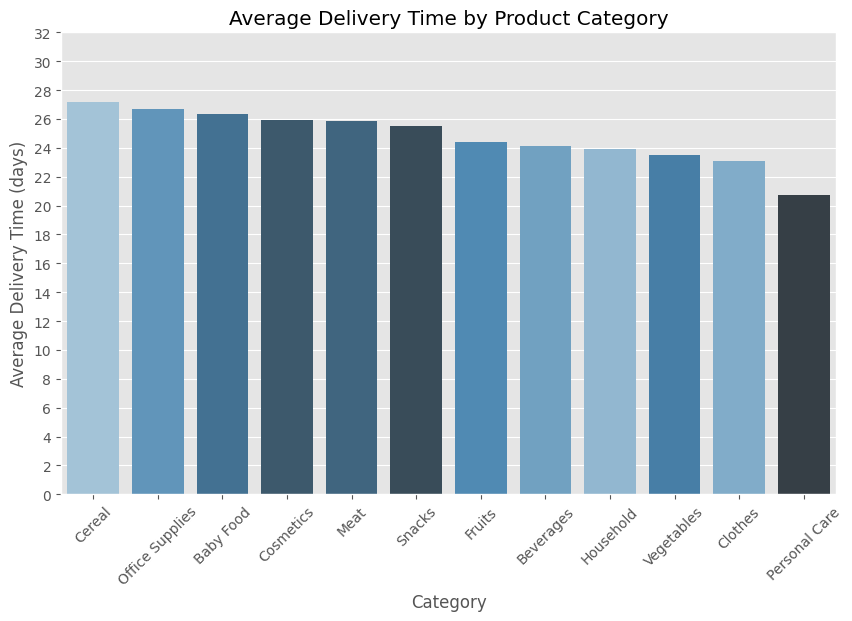

In [564]:
#Analysis and visualization of the average time interval by product categories
plt.style.use("ggplot")
plt.figure(figsize=(10,6))

order_cat = df.groupby("Category")["Delivery Days"].mean().sort_values(ascending=False).index

bars = sns.barplot(data=df, x="Category", y="Delivery Days", hue="Category", estimator="mean", palette="Blues_d", errorbar=("ci", False), order=order_cat)
plt.title("Average Delivery Time by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Delivery Time (days)")
plt.xticks(rotation=45)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 2)
plt.yticks(y_ticks)

plt.show()

###Аналіз інтервалу у розрізі країн

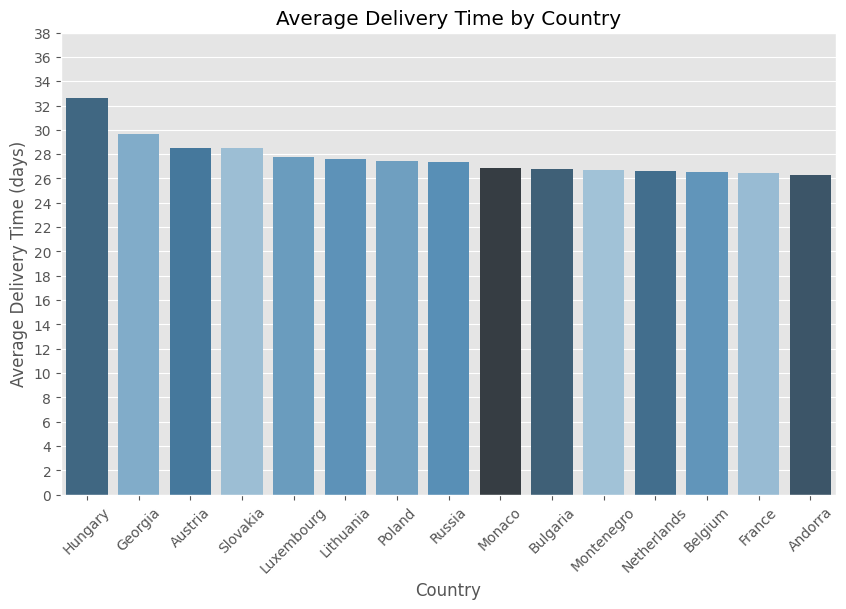

In [565]:
#Аналіз та візуалізація cереднього інтервалу часу за країнами
plt.style.use("ggplot")
plt.figure(figsize=(10,6))

order_cat = df.groupby("Country")["Delivery Days"].mean().nlargest(15).sort_values(ascending=False).index

bars = sns.barplot(data=df, x="Country", y="Delivery Days", hue="Country", estimator="mean", palette="Blues_d", errorbar=("ci", False), order=order_cat)
plt.title("Average Delivery Time by Country")
plt.xlabel("Country")
plt.ylabel("Average Delivery Time (days)")
plt.xticks(rotation=45)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 2)
plt.yticks(y_ticks)

plt.show()

###Аналіз інтервалу у розрізі регіонів

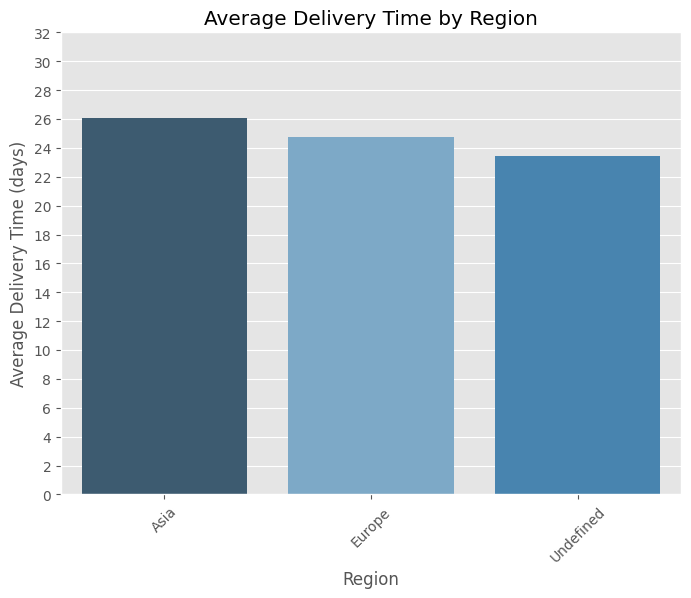

In [566]:
#Аналіз та візуалізація cереднього інтервалу часу за регіонами
plt.style.use("ggplot")
plt.figure(figsize=(8,6))

order_cat = df.groupby("Region")["Delivery Days"].mean().nlargest(15).sort_values(ascending=False).index

bars = sns.barplot(data=df, x="Region", y="Delivery Days", hue="Region", estimator="mean", palette="Blues_d", errorbar=("ci", False), order=order_cat)
plt.title("Average Delivery Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Delivery Time (days)")
plt.xticks(rotation=45)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 2)
plt.yticks(y_ticks)

plt.show()

##Analysis of the dependence of profit on the time required for product shipment

In [567]:
#Grouping, creating bins (intervals) for analysis
profit_by_days = df.groupby("Delivery Days")["Profit"].agg(["mean", "median", "count", "sum"]).reset_index()

bins = [0, 1, 3, 7, 14, df["Delivery Days"].max()]
labels = ["0-1", "2-3", "4-7", "8-14", "15+"]

df["Delivery_Bin"] = pd.cut(df["Delivery Days"], bins=bins, labels=labels, include_lowest=True)
profit_by_bins = df.groupby("Delivery_Bin")["Profit"].agg(["mean", "median", "count"]).reset_index()


/tmp/ipython-input-94408822.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_bins = df.groupby("Delivery_Bin")["Profit"].agg(["mean", "median", "count"]).reset_index()


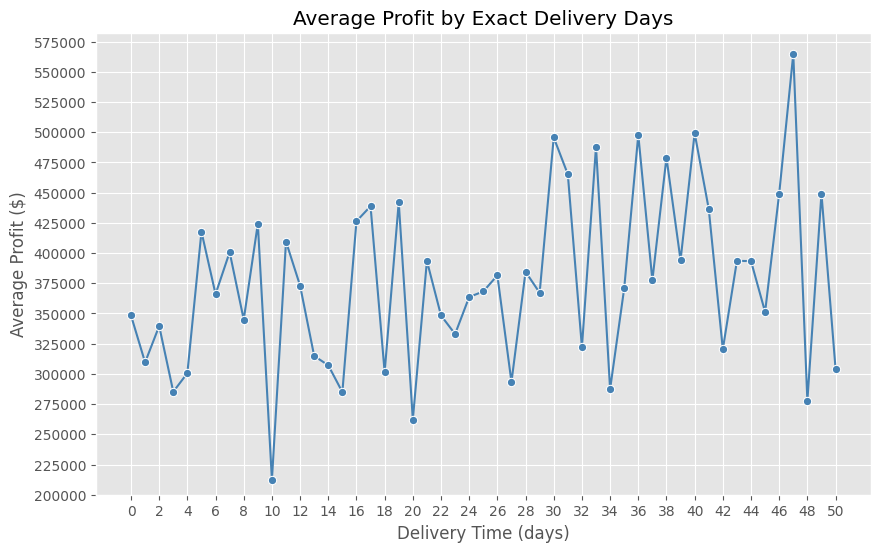

In [568]:
#Visualization of the dependence of average profit on the interval
plt.figure(figsize=(10,6))
sns.lineplot(data=profit_by_days, x="Delivery Days", y="mean", marker="o", color="steelblue")
plt.title("Average Profit by Exact Delivery Days")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Average Profit ($)")

x_ticks = np.arange(0, profit_by_days["Delivery Days"].max() + 2, 2)
plt.xticks(x_ticks)

y_min = 200000
y_max = plt.gca().get_ylim()[1] + 5
y_ticks = np.arange(y_min, y_max, 25000)
plt.yticks(y_ticks)
plt.ylim(y_min, y_max)

plt.show()

/tmp/ipython-input-3644362402.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Delivery_Bin")["Profit"].mean().sort_values(ascending=False).plot(kind="bar", ax=ax[0], color="skyblue")
/tmp/ipython-input-3644362402.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Delivery_Bin")["Profit"].median().sort_values(ascending=False).plot(kind="bar", ax=ax[1], color="skyblue")


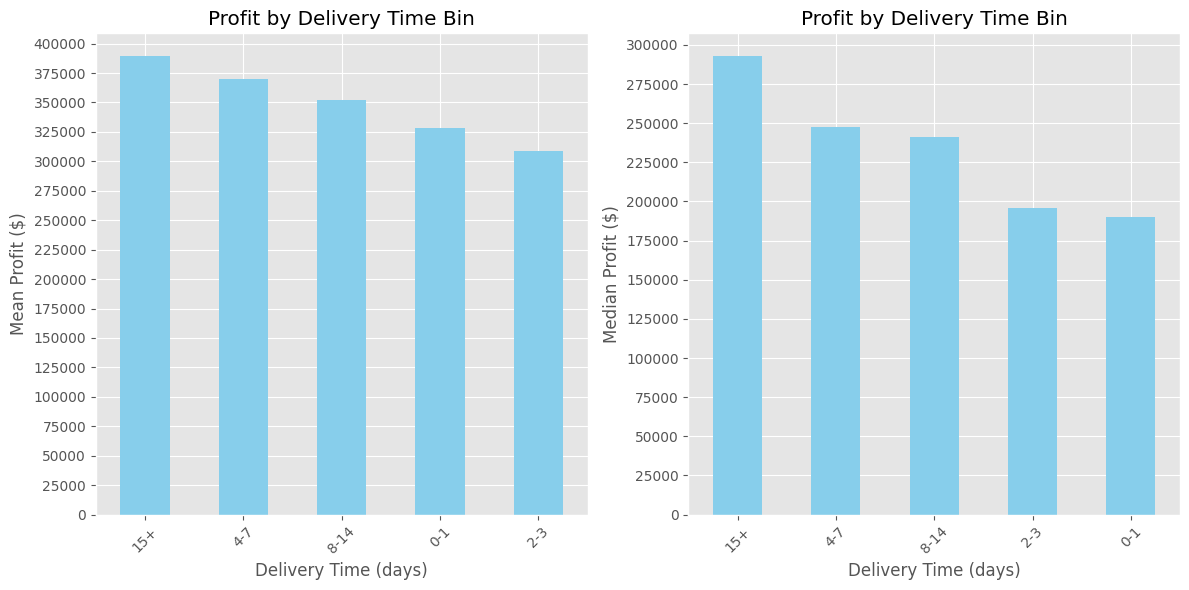

In [569]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Analysis and visualization of sales by regions
df.groupby("Delivery_Bin")["Profit"].mean().sort_values(ascending=False).plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Profit by Delivery Time Bin")
ax[0].set_xlabel("Delivery Time (days)")
ax[0].set_ylabel("Mean Profit ($)")
ax[0].tick_params(axis="x", rotation=45)

y_ticks = np.arange(0, ax[0].get_ylim()[1] + 5, 25000)
ax[0].set_yticks(y_ticks)

#Analysis and visualization of expenses by regions
df.groupby("Delivery_Bin")["Profit"].median().sort_values(ascending=False).plot(kind="bar", ax=ax[1], color="skyblue")
ax[1].set_title("Profit by Delivery Time Bin")
ax[1].set_xlabel("Delivery Time (days)")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis="x", rotation=45)

y_ticks = np.arange(0, ax[1].get_ylim()[1] + 5, 25000)
ax[1].set_yticks(y_ticks)

plt.tight_layout()
plt.show()

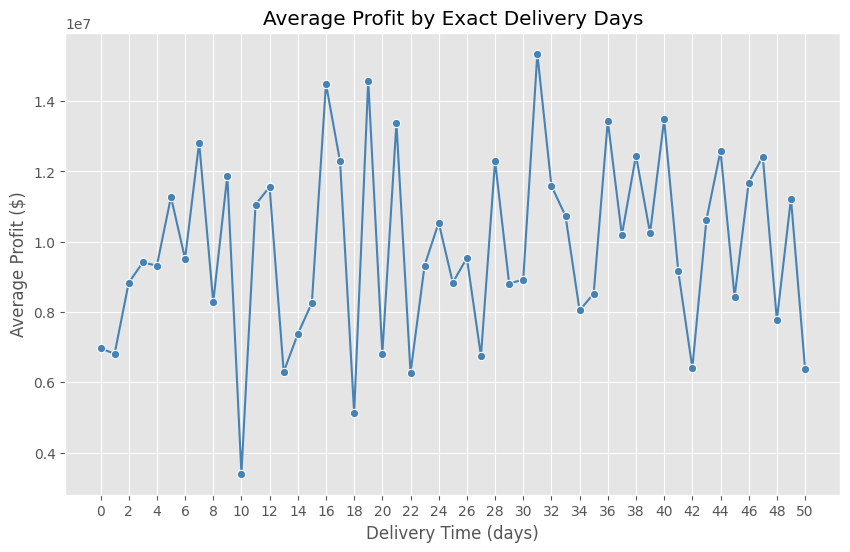

In [570]:
#Visualization of the dependence of total profit on the interval
plt.figure(figsize=(10,6))
sns.lineplot(data=profit_by_days, x="Delivery Days", y="sum", marker="o", color="steelblue")
plt.title("Average Profit by Exact Delivery Days")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Average Profit ($)")

x_ticks = np.arange(0, profit_by_days["Delivery Days"].max() + 2, 2)
plt.xticks(x_ticks)

plt.show()

##Sales dynamics (over time) across different dimensions

In [571]:
#Creating new columns with order month and year and converting them to the required format
df["Month"] = pd.to_datetime(df["Order Date"]).dt.month
df["Year"] = pd.to_datetime(df["Order Date"]).dt.year

###Overall sales dynamics (over time)

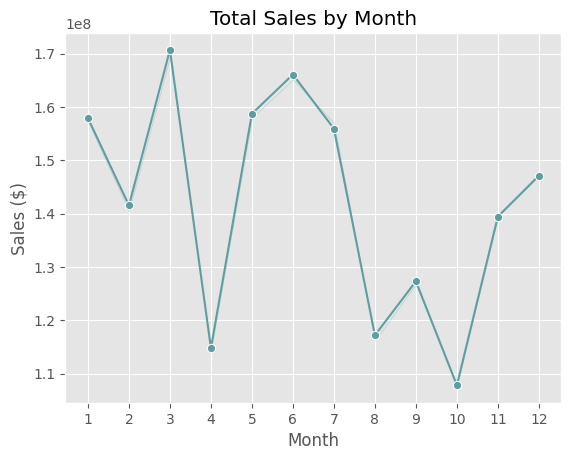

In [572]:
#Overall sales dynamics by months
sns.lineplot(data=df, x="Month",
             y="Sales",
             estimator="sum",
             errorbar=('ci', False),
             marker="o",
             color="cadetblue")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")

plt.show()

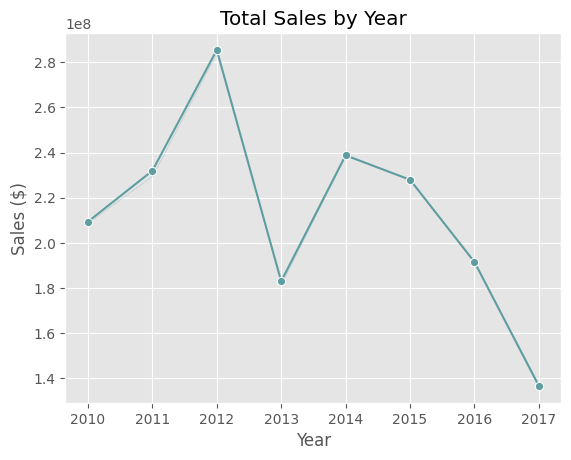

In [573]:
#Overall sales dynamics by years
sns.lineplot(data=df, x="Year",
             y="Sales",
             estimator="sum",
             errorbar=('ci', False),
             marker="o",
             color="cadetblue")
min_year = min(df["Year"])
x_ticks = np.arange(min_year, df["Year"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")

plt.show()

###Sales dynamics (over time) by categories

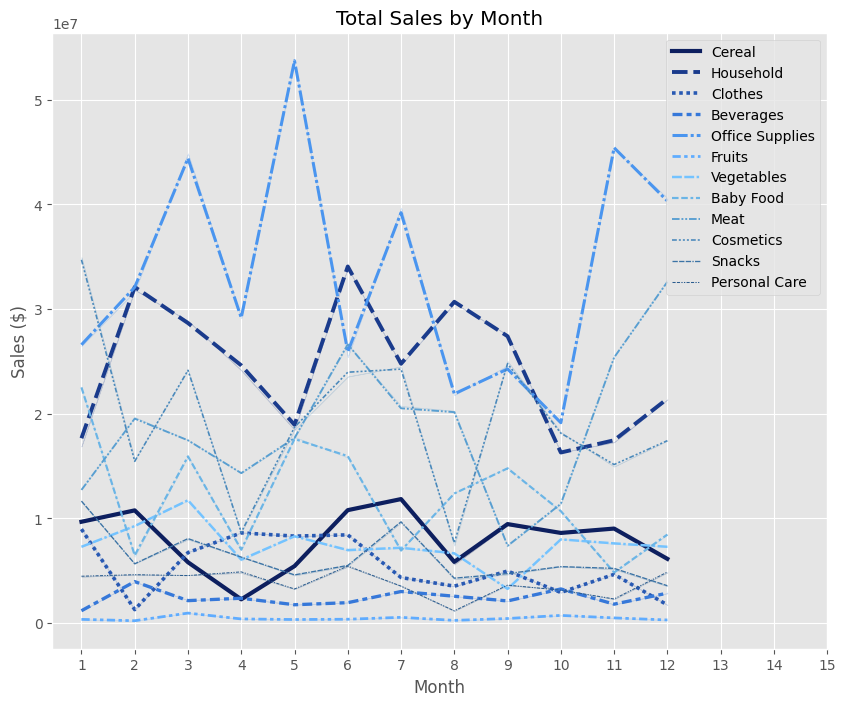

In [574]:
#Sales dynamics by months by categories (general chart for clarity)
plt.figure(figsize=(10, 8))
palette_blue_on_gray = ["#0d1f5f","#1a3b8c","#2859b3","#3678d9","#4a95ef","#5facff","#74c3ff","#6bb5e6","#599fd1","#4a89bb","#3b73a5","#2c5d8f"]
sns.lineplot(data=df, x="Month",
             y="Sales",
             estimator="sum",
             hue="Category",
             errorbar=('ci', False),
             size="Category",
             style="Category",
             palette=palette_blue_on_gray)

x_ticks = np.arange(1, df["Month"].max()+4, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

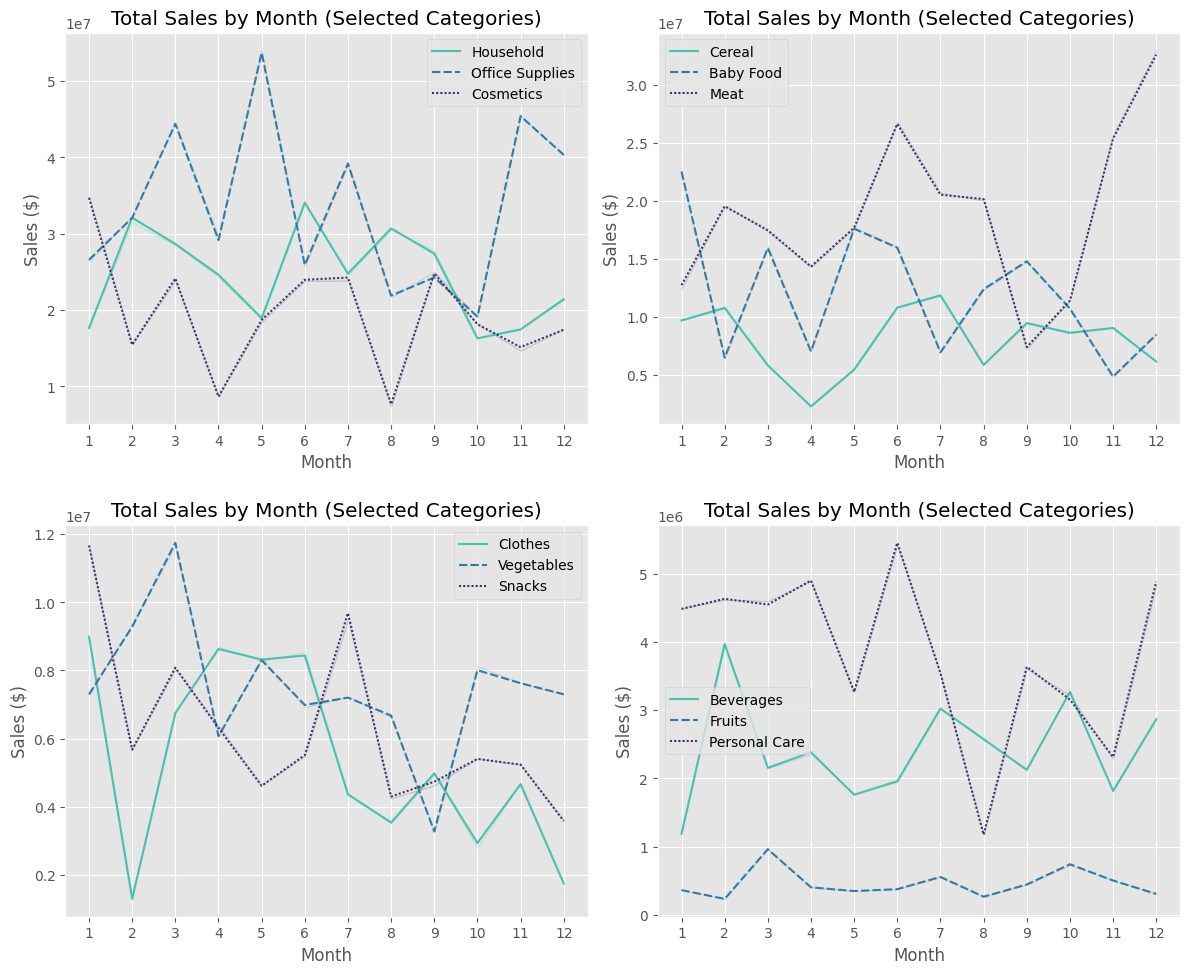

In [575]:
#Sales dynamics by months by categories (in multiple charts, three categories per chart for more detailed analysis)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
categories_to_plot1 = ["Office Supplies", "Household", "Cosmetics"]
df_filtered1 = df[df['Category'].isin(categories_to_plot1)]
palette = sns.color_palette("mako_r", len(categories_to_plot1))

sns.lineplot(
    data=df_filtered1,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Total Sales by Month (Selected Categories)")
ax[0, 0].set_xlabel("Month")
ax[0, 0].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[0, 0].set_xticks(x_ticks)
ax[0, 0].legend(loc='best')

# Second subplot
categories_to_plot2 = ["Meat", "Baby Food", "Cereal"]
df_filtered2 = df[df['Category'].isin(categories_to_plot2)]
palette = sns.color_palette("mako_r", len(categories_to_plot2))

sns.lineplot(
    data=df_filtered2,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 1]
)
ax[0, 1].set_title("Total Sales by Month (Selected Categories)")
ax[0, 1].set_xlabel("Month")
ax[0, 1].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[0, 1].set_xticks(x_ticks)
ax[0, 1].legend(loc='best')

# Third subplot
categories_to_plot3 = ["Vegetables", "Snacks", "Clothes"]
df_filtered3 = df[df['Category'].isin(categories_to_plot3)]
palette = sns.color_palette("mako_r", len(categories_to_plot3))

sns.lineplot(
    data=df_filtered3,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 0]
)
ax[1, 0].set_title("Total Sales by Month (Selected Categories)")
ax[1, 0].set_xlabel("Month")
ax[1, 0].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[1, 0].set_xticks(x_ticks)
ax[1, 0].legend(loc='best')

# Fourth subplot
categories_to_plot4 = ["Personal Care", "Beverages", "Fruits"]
df_filtered4 = df[df['Category'].isin(categories_to_plot4)]
palette = sns.color_palette("mako_r", len(categories_to_plot4))

sns.lineplot(
    data=df_filtered4,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 1]
)
ax[1, 1].set_title("Total Sales by Month (Selected Categories)")
ax[1, 1].set_xlabel("Month")
ax[1, 1].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[1, 1].set_xticks(x_ticks)
ax[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

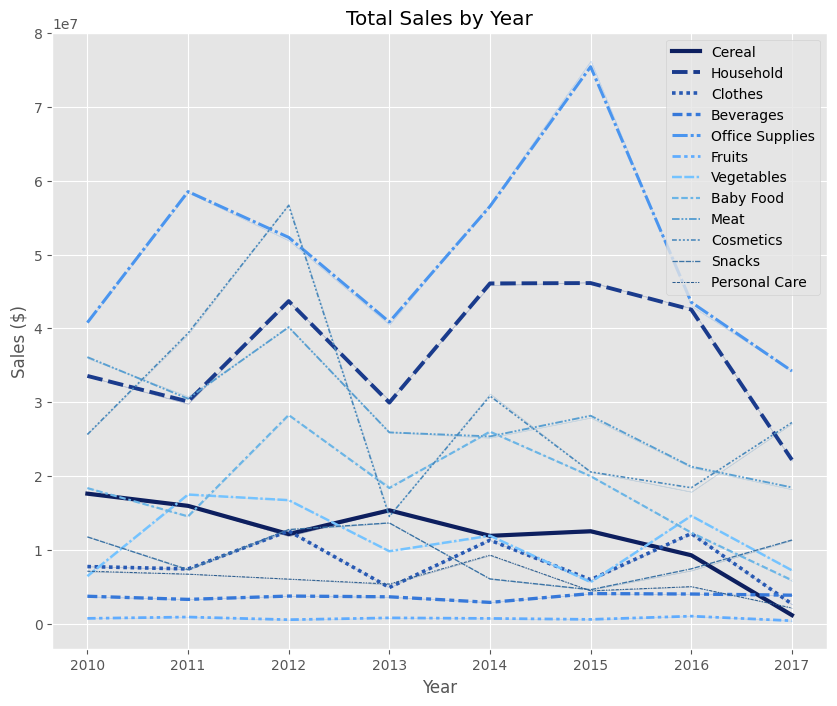

In [576]:
#Sales dynamics by years by categories (general chart for clarity)
plt.figure(figsize=(10, 8))
palette_blue_on_gray = ["#0d1f5f","#1a3b8c","#2859b3","#3678d9","#4a95ef","#5facff","#74c3ff","#6bb5e6","#599fd1","#4a89bb","#3b73a5","#2c5d8f"]
sns.lineplot(data=df, x="Year",
             y="Sales",
             estimator="sum",
             hue="Category",
             errorbar=('ci', False),
             size="Category",
             style="Category",
             palette=palette_blue_on_gray)

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

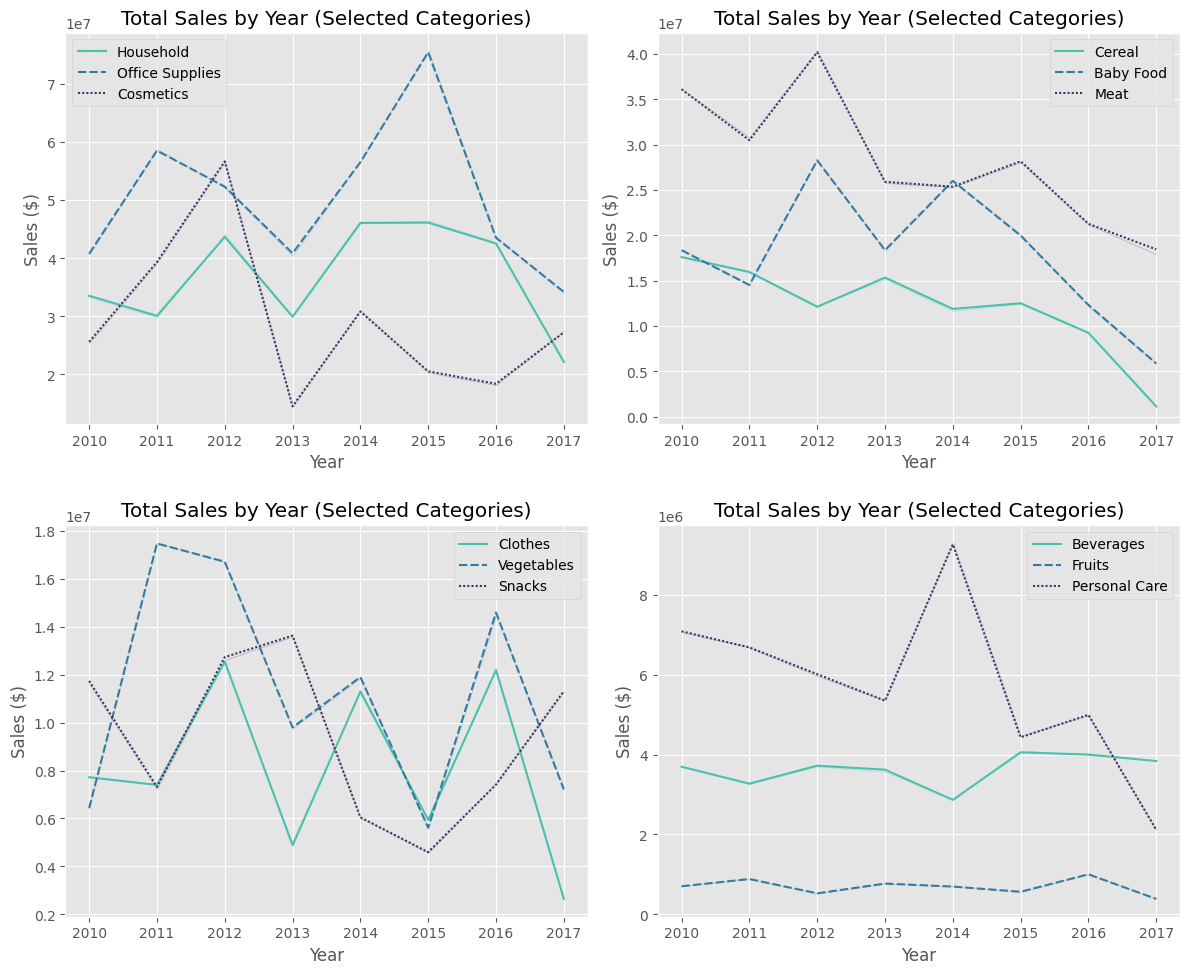

In [577]:
#Sales dynamics by years by categories (in multiple charts, three categories per chart for more detailed analysis)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
categories_to_plot1 = ["Office Supplies", "Household", "Cosmetics"]
df_filtered1 = df[df['Category'].isin(categories_to_plot1)]
palette = sns.color_palette("mako_r", len(categories_to_plot1))

sns.lineplot(
    data=df_filtered1,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Total Sales by Year (Selected Categories)")
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].legend(loc='best')

# Second subplot
categories_to_plot2 = ["Meat", "Baby Food", "Cereal"]
df_filtered2 = df[df['Category'].isin(categories_to_plot2)]
palette = sns.color_palette("mako_r", len(categories_to_plot2))

sns.lineplot(
    data=df_filtered2,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 1]
)
ax[0, 1].set_title("Total Sales by Year (Selected Categories)")
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Sales ($)")
ax[0, 1].legend(loc='best')

# Third subplot
categories_to_plot3 = ["Vegetables", "Snacks", "Clothes"]
df_filtered3 = df[df['Category'].isin(categories_to_plot3)]
palette = sns.color_palette("mako_r", len(categories_to_plot3))

sns.lineplot(
    data=df_filtered3,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 0]
)
ax[1, 0].set_title("Total Sales by Year (Selected Categories)")
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Sales ($)")
ax[1, 0].legend(loc='best')

# Fourth subplot
categories_to_plot4 = ["Personal Care", "Beverages", "Fruits"]
df_filtered4 = df[df['Category'].isin(categories_to_plot4)]
palette = sns.color_palette("mako_r", len(categories_to_plot4))

sns.lineplot(
    data=df_filtered4,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 1]
)
ax[1, 1].set_title("Total Sales by Year (Selected Categories)")
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Sales ($)")
ax[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

###Sales dynamics (over time) for the top 5 countries

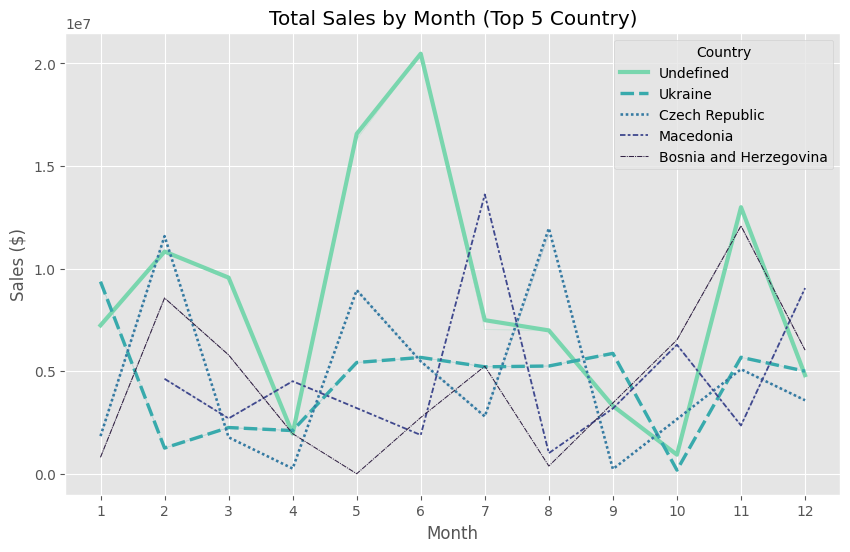

In [578]:
#Sales dynamics by months for the top 5 countries
plt.figure(figsize=(10,6))
top_counties = df.groupby("Country")["Sales"].sum().nlargest(5).index.tolist()

df_filtered = df[df["Country"].isin(top_counties)]

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df_filtered,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Country",
    errorbar=('ci', False),
    size="Country",
    style="Country",
    palette=palette
)

x_ticks = np.arange(1, df["Month"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Month (Top 5 Country)")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show()

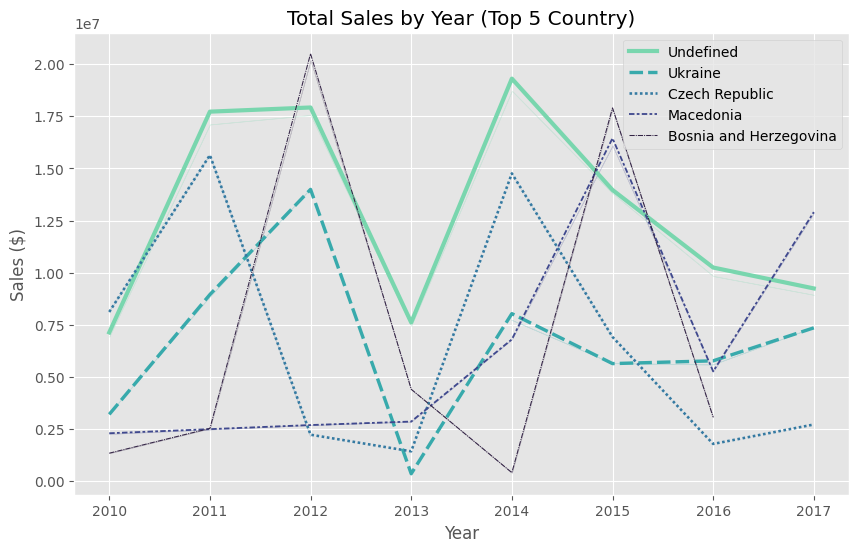

In [579]:
#Sales dynamics by years for the top 5 countries
plt.figure(figsize=(10,6))
top_counties = df.groupby("Country")["Sales"].sum().nlargest(5).index.tolist()

df_filtered = df[df["Country"].isin(top_counties)]

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df_filtered,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Country",
    errorbar=('ci', False),
    size="Country",
    style="Country",
    palette=palette
)

plt.title("Total Sales by Year (Top 5 Country)")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.legend(loc="best")
plt.show()

###Sales dynamics (over time) for regions

/tmp/ipython-input-3743002954.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


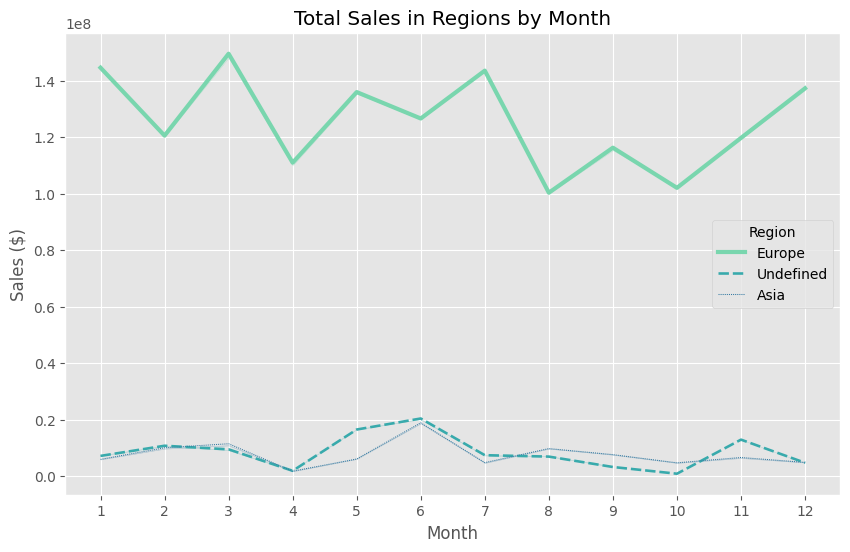

In [580]:
#Sales dynamics by months for regions
plt.figure(figsize=(10,6))

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Region",
    errorbar=('ci', False),
    size="Region",
    style="Region",
    palette=palette
)

x_ticks = np.arange(1, df["Month"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales in Regions by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show()

/tmp/ipython-input-3087724758.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


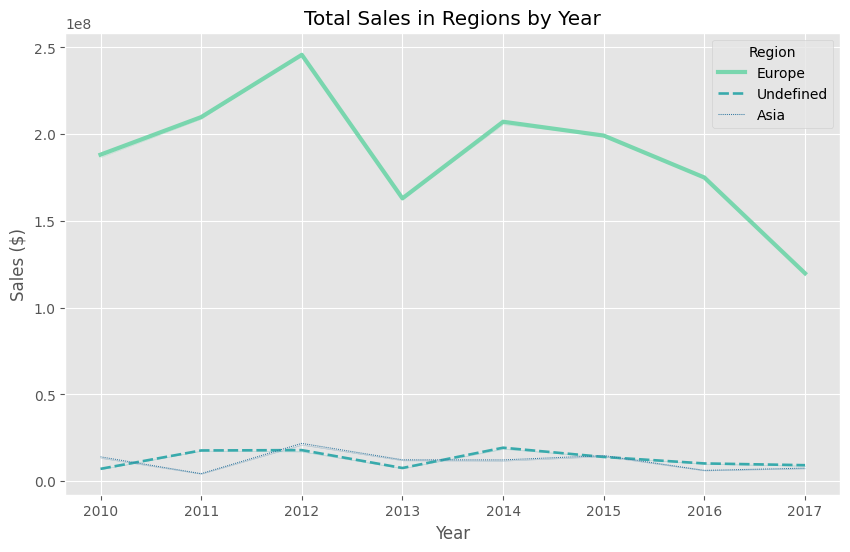

In [581]:
#Sales dynamics by years for regions
plt.figure(figsize=(10,6))

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Region",
    errorbar=('ci', False),
    size="Region",
    style="Region",
    palette=palette
)

plt.title("Total Sales in Regions by Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.show()

##Sales analysis of products by days of the week

In [582]:
#Creating a new column with day of the week names
df["Order Day Name"] = df["Order Date"].dt.day_name()

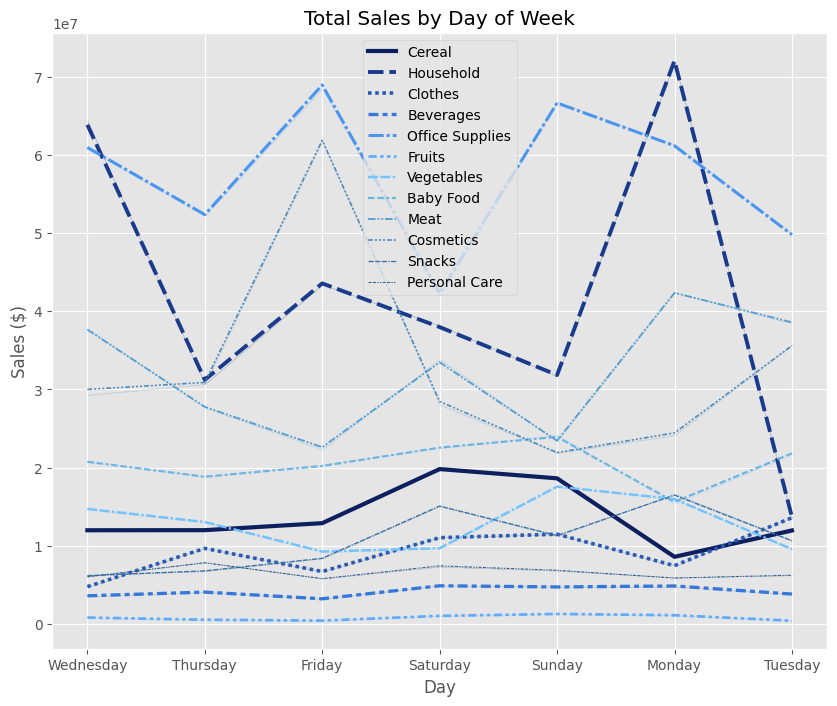

In [583]:
#Sales analysis by days of the week by categories (general chart for clarity)
plt.figure(figsize=(10, 8))
palette_blue_on_gray = ["#0d1f5f","#1a3b8c","#2859b3","#3678d9","#4a95ef","#5facff","#74c3ff","#6bb5e6","#599fd1","#4a89bb","#3b73a5","#2c5d8f"]
sns.lineplot(data=df, x="Order Day Name",
             y="Sales",
             estimator="sum",
             hue="Category",
             errorbar=('ci', False),
             size="Category",
             style="Category",
             palette=palette_blue_on_gray)

plt.title("Total Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Sales ($)")
plt.legend(loc="best")

plt.show()

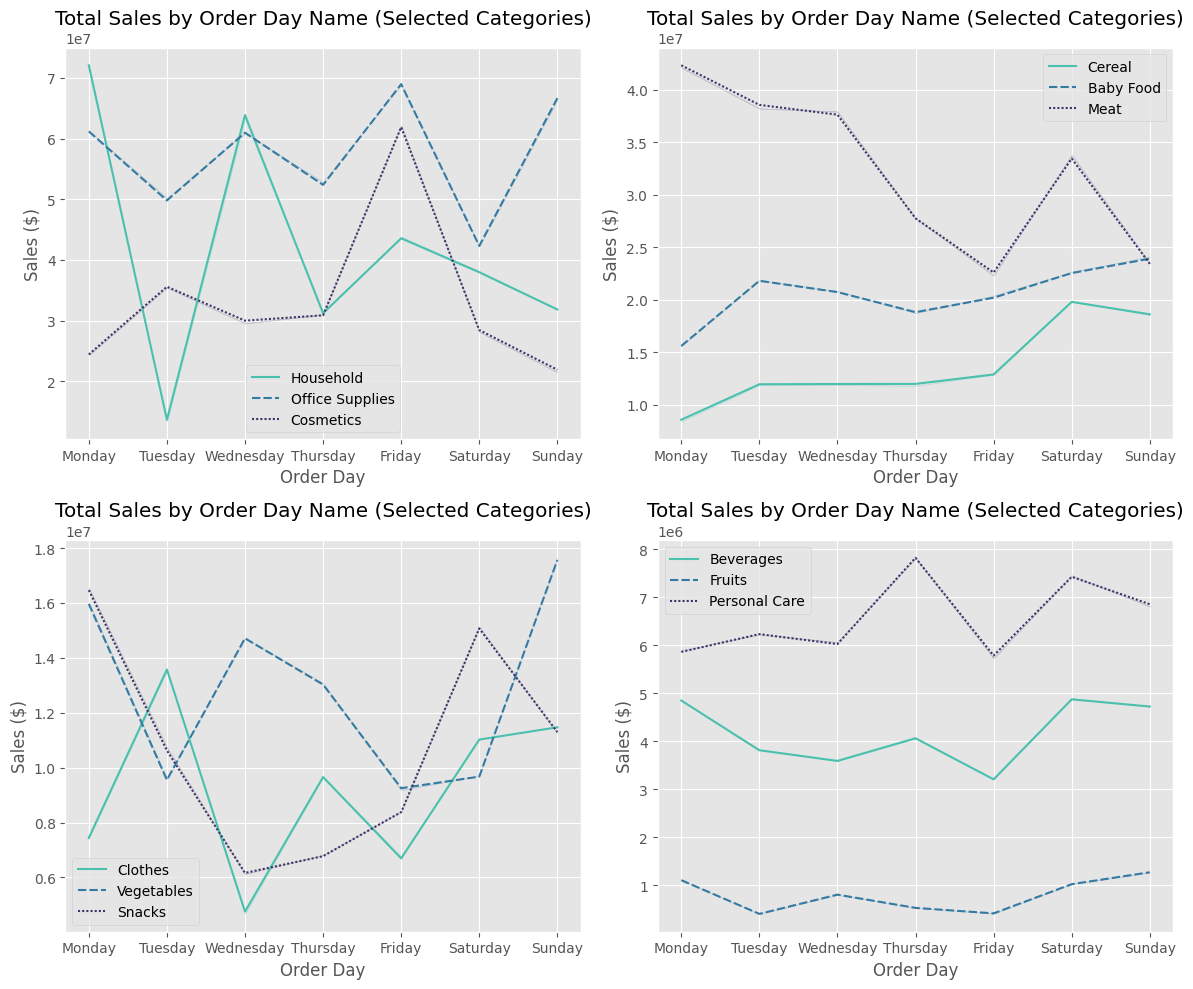

In [584]:
#Sales analysis by days of the week by categories (detailed visualizations with 3 categories per chart for clarity)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Order Day Name"] = pd.Categorical(df["Order Day Name"], categories=order, ordered=True)

# First subplot
categories_to_plot1 = ["Office Supplies", "Household", "Cosmetics"]
df_filtered1 = df[df['Category'].isin(categories_to_plot1)]
palette = sns.color_palette("mako_r", len(categories_to_plot1))

sns.lineplot(
    data=df_filtered1,
    x="Order Day Name",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[0, 0].set_xlabel("Order Day")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].legend(loc='best')

# Second subplot
categories_to_plot2 = ["Meat", "Baby Food", "Cereal"]
df_filtered2 = df[df['Category'].isin(categories_to_plot2)]
palette = sns.color_palette("mako_r", len(categories_to_plot2))

sns.lineplot(
    data=df_filtered2,
    x="Order Day Name",
    y="Sales",
    hue="Category",
    style="Category",
    palette=palette,
    estimator="sum",
    errorbar=('ci', False),
    ax=ax[0, 1]
)
ax[0, 1].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[0, 1].set_xlabel("Order Day")
ax[0, 1].set_ylabel("Sales ($)")
ax[0, 1].legend(loc='best')

# Third subplot
categories_to_plot3 = ["Vegetables", "Snacks", "Clothes"]
df_filtered3 = df[df['Category'].isin(categories_to_plot3)]
palette = sns.color_palette("mako_r", len(categories_to_plot3))

sns.lineplot(
    data=df_filtered3,
    x="Order Day Name",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 0]
)
ax[1, 0].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[1, 0].set_xlabel("Order Day")
ax[1, 0].set_ylabel("Sales ($)")
ax[1, 0].legend(loc='best')

# Fourth subplot
categories_to_plot4 = ["Personal Care", "Beverages", "Fruits"]
df_filtered4 = df[df['Category'].isin(categories_to_plot4)]
palette = sns.color_palette("mako_r", len(categories_to_plot4))

sns.lineplot(
    data=df_filtered4,
    x="Order Day Name",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 1]
)
ax[1, 1].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[1, 1].set_xlabel("Order Day")
ax[1, 1].set_ylabel("Sales ($)")
ax[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

From the charts above, we see that most categories can be considered seasonal. Since they all have rises and falls depending on the day of the week. Only one category can be considered 'constant' - **Fruits**. From the charts, it's clear that the number of sales in this category is at the same level, but compared to other categories, Fruits is not very profitable.

#Reporting

##Introduction

###Analysis objectives

This report presents a detailed analysis of the company's product sales, which operates in the global market and sells goods in both regular stores and online shops.

**Main objective of the analysis** — data cleaning and conducting analysis; finding valuable insights into the company's operations.

###Data sources

The dataset consists of **three** tables::

* events.csv — sales over several years
* products.csv — product categories and their id
* countries.csv — countries, regions, and their codes

They were merged into one dataset with the 'main' sales table spanning several years.

Countries, regions, and their codes were joined to the sales table by the common country code column.

Product categories were joined to the sales table by the common product ID column.

##Data description after preparation

During the data verification and cleaning process, it was found that the table was missing a code and region for one country. This row was removed.

In the sales table, there were quite a few missing country code values. Therefore, the decision was made to fill the missing values with 'Undefined' to avoid losing valuable data for analyzing the complete picture.

In the product categories table, there were no missing values.

There were also no duplicates or repetitions in the tables.

In the Sales Channels column, there were issues with word capitalization (identical words started with different case letters, which created problems during analysis), but the issue was resolved by capitalizing the first letter of each word.

##Key business metrics

* Total number of orders: 1330
* Total revenue: 1704623436.08 $
* Total profit: 501841827.12 $
* Total expenses: 1202781608.96 $
* Store profitability: 29.44%
* Number of countries covered: 46 (including "Undefined" category)
* Number of regions covered: 3 (including "Undefined" category)

##Main insights from the analysis

* The most profitable product categories are Cosmetics, Office Supplies, and Household.
* The countries generating the highest revenue are, in order, the "Undefined" category, Andorra, and Ukraine.
* The regions bringing the most revenue are Europe, the "Undefined" category, and Asia.
* There is no significant difference between sales channels; however, purchases were more frequently made offline.
* On average, delivery takes **25 days**. The chart shows that profitability does not consistently increase or decrease with delivery delay-instead, it fluctuates chaotically. This may indicate that factors other than delivery time influence profit.
* Sales dynamics over time show that March has the highest sales. There is clear seasonality, with summer being the peak sales period, while late summer to early autumn is less profitable. The sales peak occurred in 2012, followed by a sharp drop in 2013, partial recovery in 2014–2015, and another significant decline in 2016–2017.
* The peak days of the week for purchases are Wednesday and Friday.

##Business conclusions

The store should focus on selling its top categories. Prioritize sales in countries with the highest income in Europe. Optimize product delivery time and improve customer communication channels.
Although the analysis shows that delivery time does not strongly affect revenue. However, improving delivery will help 'smooth out' the situation and improve store revenue.